In [1]:

import math
from collections import namedtuple
import numpy as np
from operator import itemgetter
import time
from bitarray import bitarray
import random
import matplotlib.pyplot as plt

input_location = '././data/tsp_Kopt'
# input_location = '././data/tsp_51_1'

with open(input_location, 'r') as input_data_file:
    input_data = input_data_file.read()
# print(input_data)

Point = namedtuple("Point", ['x', 'y'])
Edge = namedtuple("Edge", ['x', 'y','u','v'])

def length(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

def dist_matrix(points):
    node_count = len(points)
    M = np.zeros((node_count, node_count), dtype=float)
    for idx, point in enumerate(points):
        for idx2, point2 in enumerate(points):
            M[idx,idx2] = M[idx2,idx] = length(point, point2)
            if idx == idx2:
                M[idx,idx2] = 200
    return M.round(2)

def draw_point(points):
    plt.scatter(*zip(*points))
    plt.xlim(-0.1, 2)
    plt.ylim(-0.1, 2)

def calculate_objective(points, solution):
    obj = length(points[solution[-1]], points[solution[0]])
    for index in range(0, nodeCount-1):
        obj += length(points[solution[index]], points[solution[index+1]])
    return obj

def draw_trajetory(points, solution):
    node_count = len(points)
    solution_graph = []
    start_point = points[solution[0]]

    for index in range(1, node_count):
        solution_graph += [Edge(start_point.x, start_point.y, points[solution[index]].x - start_point.x, points[solution[index]].y-start_point.y)]
        start_point = points[solution[index]]
    solution_graph += [Edge(start_point.x, start_point.y, points[solution[0]].x-start_point.x, points[solution[0]].y-start_point.y)]

    draw_point(points)

    plt.quiver(*zip(*solution_graph), color='r',angles='xy', scale_units='xy',  scale=1)
    plt.xlim(-0.1, 4.5)
    plt.ylim(-0.1, 3)
    # plt.xlim(0, 70)
    # plt.ylim(0, 80)

    texts = range(node_count)

    for i, txt in enumerate(texts):
        plt.annotate(txt, (points[i].x, points[i].y+0.1))

    plt.show()

def two_opt(solution, idx1, d_matrix):
    # idx1 = random.randint(0, len(solution))
    # idx1 = 3
    idx2 = idx1+1
    c1, c2 = solution[idx1], solution[idx2]
    # c3 = random.choice(np.where(d_matrix[c2, :] < d_matrix[c1,c2])[0].tolist())
    c3 = np.argmin(d_matrix[c2, :])
    idx3 = solution.index(c3)
    if idx3 > idx2:
        solution[idx3-1], solution[idx2] = solution[idx2], solution[idx3-1]
        solution[idx2+1:idx3-1] = solution[idx3-2:idx2:-1]
    else:
        solution[idx3], solution[idx1] = solution[idx1], solution[idx3]
        solution[idx1+1:idx3] = solution[idx3-1:idx1:-1]
    return solution

def k_opt(points, solution, d_matrix):
    best_solution = solution
    best_result = calculate_objective(points, solution)

    for idx1 in range(len(solution)):
        different = True
        while different:
            next_solution = two_opt(solution, idx1, d_matrix)
            next_result = calculate_objective(points, solution)
            if next_solution == solution:
                different = False
            else:
                if next_result > best_result:
                    best_solution = next_solution
                    best_result = next_result
                solution = next_solution
                draw_trajetory(points, solution)
    return best_solution, best_result

lines = input_data.split('\n')

nodeCount = int(lines[0])

points = []
for i in range(1, nodeCount+1):
    line = lines[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

d_matrix = dist_matrix(points)
print(d_matrix)


solution = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
random.shuffle(solution)

print('initial trajectory')
draw_trajetory(points, solution)

solution, result = k_opt(points, solution, d_matrix)

print('one iteration K-opt')
draw_trajetory(points, solution)

#
# draw_trajetory(points, solution)
#
# solution2_ = two_opt(solution, d_matrix)
#
# draw_trajetory(points, solution2_)
#
# solution3_ = two_opt(solution2_, d_matrix)
#
# draw_trajetory(points, solution3_)
#
# solution4_ = two_opt(solution3_, d_matrix)
#
# draw_trajetory(points, solution4_)
#
# solution2 = [0, 2, 4, 3, 7, 11, 10, 9, 8, 5, 6, 1]
#
# solution3 = [0, 2, 4, 3, 5, 8, 9, 10, 11, 7, 6, 1]
#
# solution4 = [0, 2, 3, 4, 5, 8, 9, 10, 11, 7, 6, 1]
#
# # solution5 = [0, 3, 4, 2, 7, 11, 10, 9, 8, 5, 6, 1]
#
# # random.shuffle(solution)
#
# draw_trajetory(points, solution4)

# calculate the length of the tour
obj = length(points[solution[-1]], points[solution[0]])
for index in range(0, nodeCount-1):
    obj += length(points[solution[index]], points[solution[index+1]])

# prepare the solution in the specified output format
output_data = '%.2f' % obj + ' ' + str(0) + '\n'
output_data += ' '.join(map(str, solution))

print(output_data)




[[200.     1.     2.01   2.42   2.16   2.44   2.2    2.61   3.     4.
    3.9    2.81]
 [  1.   200.     2.15   2.2    1.81   1.91   1.57   1.84   2.31   3.26
    3.     1.81]
 [  2.01   2.15 200.     0.82   1.02   1.46   1.62   2.09   2.12   3.03
    3.44   3.16]
 [  2.42   2.2    0.82 200.     0.45   0.76   1.06   1.44   1.35   2.21
    2.69   2.69]
 [  2.16   1.81   1.02   0.45 200.     0.45   0.64   1.08   1.12   2.09
    2.42   2.26]
 [  2.44   1.91   1.46   0.76   0.45 200.     0.4    0.68   0.68   1.66
    1.97   1.97]
 [  2.2    1.57   1.62   1.06   0.64   0.4  200.     0.5    0.8    1.8
    1.9    1.63]
 [  2.61   1.84   2.09   1.44   1.08   0.68   0.5  200.     0.51   1.41
    1.4    1.34]
 [  3.     2.31   2.12   1.35   1.12   0.68   0.8    0.51 200.     1.01
    1.34   1.77]
 [  4.     3.26   3.03   2.21   2.09   1.66   1.8    1.41   1.01 200.
    0.98   2.24]
 [  3.9    3.     3.44   2.69   2.42   1.97   1.9    1.4    1.34   0.98
  200.     1.53]
 [  2.81   1.81   3.16   2

KeyboardInterrupt: 

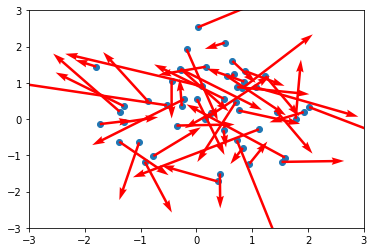

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create some random dots
x = np.random.randn(50)
y = np.random.randn(50)

# Create some random vectors
u = np.random.randn(50)
v = np.random.randn(50)

# Create a scatter plot for the dots
plt.scatter(x, y)

# Create a quiver plot for the vectors
plt.quiver(x, y, u, v, color='r', angles='xy', scale_units='xy', scale=1)

# Set the axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Show the plot
plt.show()


In [ ]:
from collections import namedtuple
import numpy as np
from operator import itemgetter
import time
from bitarray import bitarray
import random

input_location = '././data/gc_250_9'
with open(input_location, 'r') as input_data_file:
    input_data = input_data_file.read()
# print(input_data)

lines = input_data.split('\n')

first_line = lines[0].split()
node_count = int(first_line[0])
edge_count = int(first_line[1])

edges = []

for i in range(1, edge_count + 1):
    line = lines[i]
    parts = line.split()
    edges.append((int(parts[0]), int(parts[1])))

# print(edges)

init = time.time()

node_degree = np.zeros((node_count,1))
for par in edges:
    node_degree[par[0]]+=1
    node_degree[par[1]]+=1

# print(node_degree)

edge_matrix = np.identity(node_count, dtype = bool)

for par in edges:
    edge_matrix[par[0], par[1]] = 1

edge_matrix = edge_matrix + edge_matrix.T
# print(edge_matrix)

color_counter = 0
color = np.zeros((node_count,1), dtype=bool)
temp_color = np.zeros((node_count,1), dtype=bool)
colors = [np.zeros((node_count,1),dtype=bool)]

colored_nodes = np.zeros((node_count,1),dtype=bool)
for elem in colors:
    colored_nodes += elem

while(sum(colored_nodes)<node_count):
    # print(color_counter)
    max_node = np.argmax(node_degree * np.invert(colored_nodes))
    temp_color = np.zeros((node_count,1), dtype=bool)
    temp_color[max_node] = 1
    not_neighbors = np.invert(edge_matrix[max_node, :]).reshape(node_count,1) * np.invert(colored_nodes)
    not_neighbors_list = (np.where(not_neighbors==1)[0]).tolist()

    if len(not_neighbors_list) != 0:
        while len(not_neighbors_list) != 0:
            if sum(not_neighbors) == 0:
                color = temp_color
                colors.append(color)
                color_counter +=1
                colored_nodes += color
                not_neighbors_list = []
            else:
                checking = edge_matrix[not_neighbors.flatten()] @ not_neighbors
                if sum(checking) == 0:
                    color = temp_color + not_neighbors
                    colors.append(color)
                    color_counter +=1
                    colored_nodes += color
                    not_neighbors_list = []
                else:
                    max_node = np.argmax(node_degree*not_neighbors)
                    # not_neighbors[max_node] = 0
                    temp_color[max_node] = 1
                    not_neighbors_list = (np.where(not_neighbors==1)[0]).tolist()
                    not_neighbors = not_neighbors * np.invert(edge_matrix[:, max_node]).reshape(node_count,1)
    else:
        color = temp_color
        colors.append(color)
        color_counter +=1
        colored_nodes += color
        not_neighbors_list = []

node_colors = [0]*node_count

colors_table = np.array(colors).reshape(color_counter+1,node_count)

for i in range(node_count):
   node_colors[i] =  np.argmax(colors_table[:,i])-1

color_upper_bound = np.max(node_colors)+1
print('color upper bound: {}'.format(color_upper_bound))
# print(node_colors)

#######################################################################
color_upper_bound = np.max(node_colors)+1

best_color_optim = color_upper_bound
best_node_colors = node_colors

if color_upper_bound != 18:
    while best_color_optim >= color_upper_bound or time.time() - init < 20:
        color_counter = 0
        color = np.zeros((node_count,1), dtype=bool)
        temp_color = np.zeros((node_count,1), dtype=bool)
        colors = [np.zeros((node_count,1),dtype=bool)]

        colored_nodes = np.zeros((node_count,1),dtype=bool)
        for elem in colors:
            colored_nodes += elem

        while(sum(colored_nodes)<node_count):
            if color_counter >= color_upper_bound:
                break
            # print(color_counter)
            max_node = random.choice((np.where(np.invert(colored_nodes)==1)[0]).tolist())
            temp_color = np.zeros((node_count,1), dtype=bool)
            temp_color[max_node] = 1
            not_neighbors = np.invert(edge_matrix[max_node, :]).reshape(node_count,1) * np.invert(colored_nodes)
            not_neighbors_list = (np.where(not_neighbors==1)[0]).tolist()

            if len(not_neighbors_list) != 0:
                while len(not_neighbors_list) != 0:
                    if sum(not_neighbors) == 0:
                        color = temp_color
                        colors.append(color)
                        color_counter +=1
                        colored_nodes += color
                        not_neighbors_list = []
                    else:
                        checking = edge_matrix[not_neighbors.flatten()] @ not_neighbors
                        if sum(checking) == 0:
                            color = temp_color + not_neighbors
                            colors.append(color)
                            color_counter +=1
                            colored_nodes += color
                            not_neighbors_list = []
                        else:
                            max_node = random.choice((np.where(not_neighbors==1)[0]).tolist())
                            # not_neighbors[max_node] = 0
                            temp_color[max_node] = 1
                            not_neighbors_list = (np.where(not_neighbors==1)[0]).tolist()
                            not_neighbors = not_neighbors * np.invert(edge_matrix[:, max_node]).reshape(node_count,1)
            else:
                color = temp_color
                colors.append(color)
                color_counter +=1
                colored_nodes += color
                not_neighbors_list = []

        node_colors = [0]*node_count

        colors_table = np.array(colors).reshape(color_counter+1,node_count)

        for i in range(node_count):
           node_colors[i] =  np.argmax(colors_table[:,i])-1

        color_optim = np.max(node_colors)+1
        print('color optim: {}'.format(color_optim))

        if color_optim <= best_color_optim:
            best_color_optim = color_optim
            best_node_colors = node_colors

print('best color optim: {}'.format(best_color_optim))
print('best node colors: {}'.format(best_node_colors))









print('end')

In [ ]:
###THIS SOLUTION GETS 10s IN ALL PROBLEMS
##########################################
from collections import namedtuple
import numpy as np
from operator import itemgetter
import time
from bitarray import bitarray

input_location = './data/ks_4_0'
with open(input_location, 'r') as input_data_file:
    input_data = input_data_file.read()
print(input_data)

Item = namedtuple("Item", ['index', 'value', 'weight'])

# parse the input
lines = input_data.split('\n')

firstLine = lines[0].split()
item_count = int(firstLine[0])
capacity = int(firstLine[1])

items = []

for i in range(1, item_count + 1):
    line = lines[i]
    parts = line.split()
    items.append(Item(i - 1, int(parts[0]), int(parts[1])))

init_time = time.time()

items.sort(reverse=True, key=itemgetter(2))

print(items)

origin_row = np.zeros((capacity+1,1), dtype=np.int32)
destination_row = np.zeros((capacity+1,1), dtype=np.int32)

back_tracing = np.matrix(np.zeros((capacity+1, item_count+1), dtype=bool))
testMatrix = np.matrix(np.zeros((capacity+1, item_count+1), dtype=int))

for j in range(1, item_count+1):
    destination_row[items[j-1][2]:] = np.maximum(origin_row[:][items[j-1][2]:], (np.roll(origin_row[:],items[j-1][2],axis=0)[items[j-1][2]:] + items[j-1][1]))
    back_tracing[:,j] = destination_row[:]==origin_row[:]
    origin_row[:] = destination_row[:]
    testMatrix[:,j] = destination_row[:]

print(testMatrix)
# print(back_tracing)
###backtracing

pointer = (capacity, item_count)
taken = [0]*len(items)
for i in range(item_count-1,-1,-1):
    if back_tracing[pointer]==True:
        pointer = (pointer[0],pointer[1]-1)
    else:
        pointer = (pointer[0]-items[pointer[1]-1][2],pointer[1]-1)
        taken[i] = 1
end_time = time.time()

indexes = [it[0] for it in items]
taken = [i for _,i in sorted(zip(indexes, taken))]


value = destination_row[-1][0]

# prepare the solution in the specified output format
output_data = str(value) + ' ' + str(1) + '\n'
output_data += ' '.join(map(str, taken))

print(output_data)


In [57]:
###THIS SOLUTION FAILS IN PROBLEMS 4 AND 6, AND GETS 10 IN OTHERS
#################################

import operator
from collections import namedtuple
import numpy as np
from operator import itemgetter
import time

input_location = './data/ks_100_0'
with open(input_location, 'r') as input_data_file:
    input_data = input_data_file.read()
print(input_data)

Item = namedtuple("Item", ['index', 'value', 'weight'])

# parse the input
lines = input_data.split('\n')

firstLine = lines[0].split()
item_count = int(firstLine[0])
capacity = int(firstLine[1])

items = []

for i in range(1, item_count + 1):
    line = lines[i]
    parts = line.split()
    items.append(Item(i - 1, int(parts[0]), int(parts[1])))

init_time = time.time()

items.sort(reverse=True, key=itemgetter(2))

print(items)


dp_table = np.matrix(np.zeros((capacity+1, item_count+1), dtype=np.int32))
print(dp_table)


#filling dynamic programming table
for j in range(1, item_count+1):
    dp_table[items[j-1][2]:, j] = np.maximum(dp_table[items[j-1][2]:, j-1], (np.roll(dp_table[:,j-1],items[j-1][2],axis=0)[items[j-1][2]:] + items[j-1][1]))

end_time = time.time()


print(dp_table)
print('dp table time: {}'.format(end_time-init_time))

init_time = time.time()
##traceBack
pointer = (capacity, item_count)
taken = [0]*len(items)
for i in range(item_count-1,-1,-1):
    if dp_table[pointer]==dp_table[pointer[0],pointer[1]-1]:
        pointer = (pointer[0],pointer[1]-1)
    else:
        pointer = (pointer[0]-items[pointer[1]-1][2],pointer[1]-1)
        taken[i] = 1
end_time = time.time()
print('dp traceback time: {}'.format(end_time-init_time))

indexes = [it[0] for it in items]
taken = [i for _,i in sorted(zip(indexes, taken))]


value = dp_table[capacity, item_count]

# prepare the solution in the specified output format
output_data = str(value) + ' ' + str(1) + '\n'
output_data += ' '.join(map(str, taken))

print(output_data)


100 100000
90000 90001
89750 89751
10001 10002
89500 89501
10252 10254
89250 89251
10503 10506
89000 89001
10754 10758
88750 88751
11005 11010
88500 88501
11256 11262
88250 88251
11507 11514
88000 88001
11758 11766
87750 87751
12009 12018
87500 87501
12260 12270
87250 87251
12511 12522
87000 87001
12762 12774
86750 86751
13013 13026
86500 86501
13264 13278
86250 86251
13515 13530
86000 86001
13766 13782
85750 85751
14017 14034
85500 85501
14268 14286
85250 85251
14519 14538
85000 85001
14770 14790
84750 84751
15021 15042
84500 84501
15272 15294
84250 84251
15523 15546
84000 84001
15774 15798
83750 83751
16025 16050
83500 83501
16276 16302
83250 83251
16527 16554
83000 83001
16778 16806
82750 82751
17029 17058
82500 82501
17280 17310
82250 82251
17531 17562
82000 82001
17782 17814
81750 81751
18033 18066
81500 81501
18284 18318
81250 81251
18535 18570
81000 81001
18786 18822
80750 80751
19037 19074
80500 80501
19288 19326
80250 80251
19539 19578
80000 80001
19790 19830
79750 79751
20041

In [54]:
init_time = time.time()

print(items)


dp_table = np.zeros((capacity+1, item_count+1))
print(dp_table)


#filling dynamic programming table
for j in range(1, item_count+1):
    for i in range(capacity+1):
        if items[j-1][2] <= i:
            dp_table[i, j] = np.maximum(dp_table[i, j-1], dp_table[i - items[j-1][2], j-1] + items[j-1][1])
        else:
            dp_table[i, j] = dp_table[i, j-1]

end_time = time.time()


#############################

init_time = time.time()

items.sort(reverse=True, key=itemgetter(2))

print(items)


dp_table = np.zeros((capacity+1, item_count+1))
print(dp_table)


#filling dynamic programming table
for j in range(1, item_count+1):
    for i in range(items[j-1][2], capacity+1):
        dp_table[i, j] = np.maximum(dp_table[i, j-1], dp_table[i - items[j-1][2], j-1] + items[j-1][1])

end_time = time.time()



11.0


In [25]:
A = np.array([[1,2],[5,3],[8,9]])
B = A[:,1]
C = A[:,0]
print(np.roll(B,2,axis=0))

D = np.maximum(B,C)
print(D)



[3 9 2]
[2 5 9]


In [2]:
import operator
from more_itertools import sort_together

list = [[0,2],[1,5],[2,1]]
list.sort(key=lambda elem: elem[1])
print(list)

indexes = [it[0] for it in items]

taken = [i for _,i in sorted(zip(indexes, taken))]

print(taken)


[[2, 1], [0, 2], [1, 5]]
[1, 0, 0]


In [ ]:


pointer = (capacity, item_count)
p = (1,1)
a = p[0] - 2
print(dp_table[pointer])

In [ ]:



from operator import itemgetter
it = items.sort(reverse=True, key=itemgetter(1))
print(items)

In [38]:
it = np.matrix(items)
print(it)

[[ 2 15  8]
 [ 1 10  5]
 [ 0  8  4]
 [ 3  4  3]]
